In [16]:
import pandas as pd
import io
import requests
import seaborn as sns    # •Librería construida sobre Matplotlib que facilita la representación gráfica de datos simplificando las llamadas a las funciones y añade rutinas propias de trazado. •Acepta las estructuras de datos de Pandas. Buenas opciones sobre paletas de colores.
import timeit
import matplotlib.pyplot as plt

In [25]:
# https://raw.githubusercontent.com/andru-brahian/7_D3_javascript_html_googlesheet_powerBI/main/base_datos_diagrama_velas.json
# https://github.com/andru-brahian/7_D3_javascript_html_googlesheet_powerBI/blob/main/base_datos_diagrama_velas.csv
url="https://raw.githubusercontent.com/andru-brahian/7_D3_javascript_html_googlesheet_powerBI/main/base_datos_diagrama_velas.csv"
s=requests.get(url).content    #Cargamos el dataset de los pasajeros del Titanic
#trading=pd.read_csv(io.StringIO(s.decode('utf-8')))
# Cargar los datos usando el separador de punto y coma
trading = pd.read_csv(url, sep=';')

<h1>Exploración de los datos</h1>

<p>
Las variables que tienen 891, como non-null count, indica que no tienen nulos.

supervivencia: Indica si el pasajero sobrevivió o no. Tiene dos categorías: 0 = No, 1 = Sí.

pclass: Clase del boleto, que representa la categoría del ticket. Tiene tres valores: 1 = 1ra clase, 2 = 2da clase, 3 = 3ra clase.

sex: Género del pasajero.

age: Edad del pasajero en años.

sibsp: Número de hermanos/cónyuges a bordo del

Titanic.

parch: Número de padres/hijos a bordo del Titanic.

ticket: Número de ticket.

fare: Tarifa pagada por el pasajero.

cabin: Número de cabina del pasajero.

embarked: Puerto de embarque, con tres

opciones: C = Cherbourg, Q = Queenstown, S = Southampton.

</p>


In [26]:
trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_date        191 non-null    object 
 1   Fecha_tradeo    191 non-null    object 
 2   Volume_AAPL     191 non-null    int64  
 3   Adj.Close_AAPL  191 non-null    float64
 4   Open_AAPL       191 non-null    float64
 5   High_AAPL       191 non-null    float64
 6   Low_AAPL        191 non-null    float64
 7   Close_AAPL      191 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.1+ KB


In [27]:
trading.columns

Index(['new_date', 'Fecha_tradeo', 'Volume_AAPL', 'Adj.Close_AAPL',
       'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL'],
      dtype='object')

Según el gráfico anterior, la clase 2 es la que tiene menos pasajeros, y la clase 3 es la que tiene más.

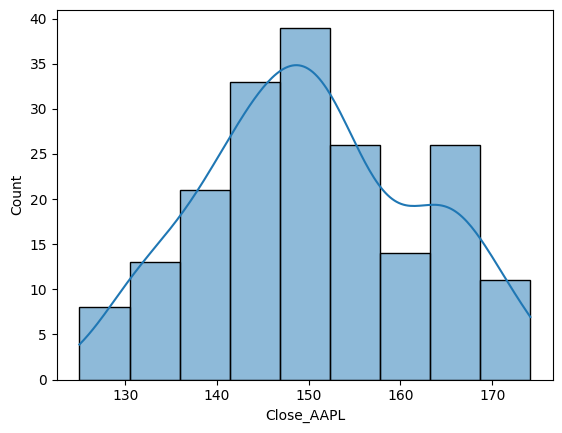

In [34]:
#Distribución de la edad(age)
sns.histplot(trading.Close_AAPL.dropna( ), kde=True)    # El True, permite ver la curva. Se hace un histograma porque la edad es una variable numérica, y el histograma es buena opción para mostrar distribuciones de variables numéricas
plt.show( )

Los datos están más concentrados desde el 142 hasta los 157.

A pesar de eso, se encuentra una desviación estandar hacia precios de cierre de AAPL mayores a 164 con una concentración considerable (hay una cantidad considerable de días en los que el precio estuvo entre 164 y 168).



Cada vela representa una clase, y se detectan valores anómalos en tercera clase y seugunda clase, tanto para el genero femenino como para el femenino.

Los valores anómalos son menores en el genero femenino.

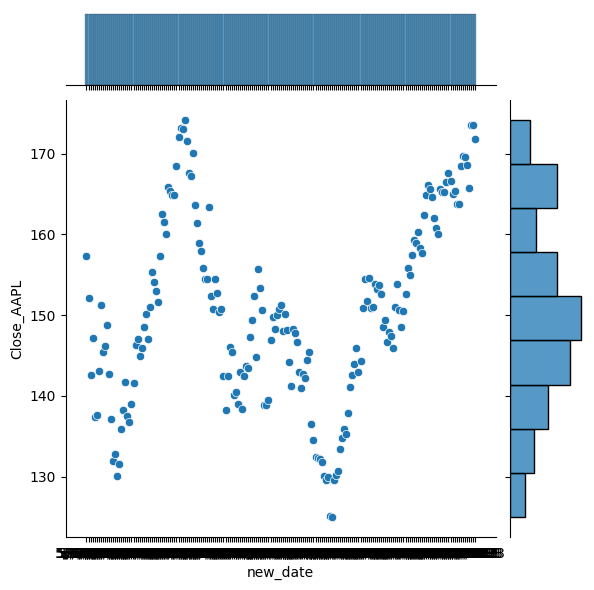

In [37]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='new_date',y='Close_AAPL',data=trading)

<h1>Mapa de calor de las correlaciones</h1>

In [42]:
tc = trading.corr()
tc

<ipython-input-42-257df1773bb2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = trading.corr()


,Volume_AAPL,Adj.Close_AAPL,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL
Volume_AAPL,1.000000,-0.371636,-0.378959,-0.335874,-0.407309,-0.364903
Adj.Close_AAPL,-0.371636,1.000000,0.976971,0.991262,0.991328,0.999770
Open_AAPL,-0.378959,0.976971,1.000000,0.990310,0.992086,0.977324
High_AAPL,-0.335874,0.991262,0.990310,1.000000,0.992171,0.991873
Low_AAPL,-0.407309,0.991328,0.992086,0.992171,1.000000,0.991265
Close_AAPL,-0.364903,0.999770,0.977324,0.991873,0.991265,1.000000


Text(0.5, 1.0, 'trading.corr()')

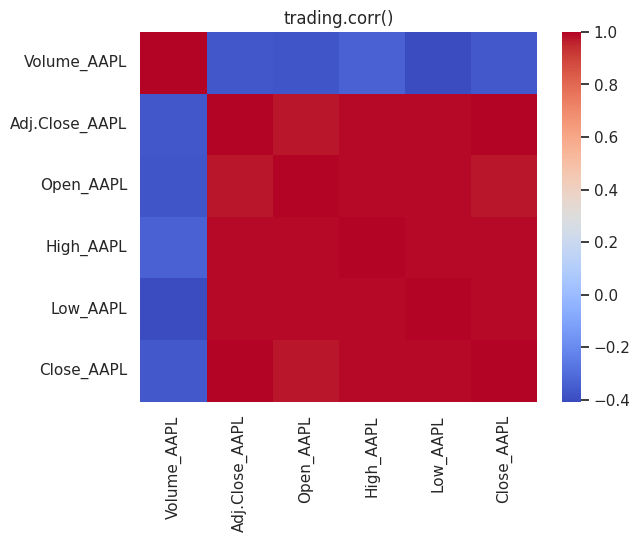

In [43]:

sns.heatmap(tc,cmap='coolwarm')    # heatmap debe recibir los datos con correlación. coolwarm Añade lógica de temperatura, entre más rojo, mayor la correlación positiva y entre más azul, mayor la correlación negativa
plt.title('trading.corr()')

Se puede observar que todos los precios tienen una correlación fuerte positiva, y esto se debe a que normalmente la varaición de los precios sigue una distribución normal, por lo cual, si un precio baja o sube , el precio de cierre no será muy diferente al precio de apertura en el día corresondiente. Lo mismo sucede con las demás variables relacionadas al precio con las cuales se hizo el diagrama de velas. Esta distribución normal permite aplicar distintos métodos de predicción de variación en los precios como simulación montecarlo, entre otras.



LINK DE GOOGLE COLLAB:
https://colab.research.google.com/drive/1XjDJeShA0lqwKMVCUAWiZX3gZfVgk477?usp=sharing

LINK DE GIT-HUB:
https://github.com/andru-brahian/7_D3_javascript_html_googlesheet_powerBI